In [2]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

In [3]:
df = fix_data(df, drop_zeros=False)

In [4]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


# BOX PLOT (years of experience)

In [5]:
df['Q1']

0      Industry
1      Industry
2      Academic
3      Industry
4      Industry
         ...   
101         NaN
102    Academic
103    Academic
104         NaN
105    Academic
Name: Q1, Length: 106, dtype: object

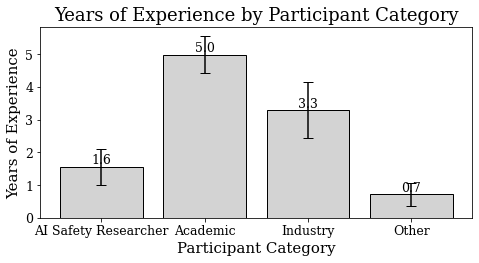

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Assume df is your dataframe
# df = pd.read_csv('your_data.csv')

# Calculate mean and SEM for each group
grouped = df.groupby('Q1')['Q2']
means = grouped.mean()
sems = grouped.apply(lambda x: stats.sem(x, nan_policy='omit'))

# Set up the plot
plt.figure(figsize=(7, 4))  # As per requirement 1
plt.rcParams['font.family'] = 'serif'  # As per requirement 2
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = 'x-small'

# Create the bar plot
bars = plt.bar(means.index, means.values, yerr=sems.values, capsize=5, color='lightgray', edgecolor='black')

# Customize the plot
plt.xlabel('Participant Category', fontsize='small')
plt.ylabel('Years of Experience', fontsize='small')
plt.title('Years of Experience by Participant Category', fontsize='medium')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontsize='x-small')

# Adjust layout and save
plt.tight_layout()
plt.show()
# plt.savefig('experience_by_category.pdf', format='pdf', dpi=300)
# plt.close()

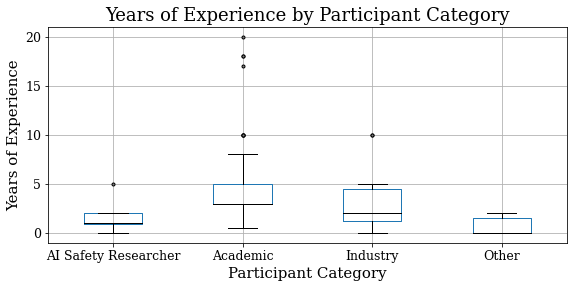

In [29]:


boxplot = df.boxplot(column='Q2', by='Q1', figsize=(9, 4), 
                     medianprops=dict(color="black"),
                     flierprops=dict(markerfacecolor="gray", markersize=3),
                     whiskerprops=dict(color="black"),
                    capprops=dict(color="black"))


plt.xlabel('Participant Category', fontsize='small')
plt.ylabel('Years of Experience', fontsize='small')
plt.title('Years of Experience by Participant Category', fontsize='medium')
plt.suptitle('')  # Remove the automatic suptitle added by pandas

# Adjust layout and save
# plt.tight_layout()
plt.show()